In [0]:
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

import matplotlib.pyplot as plt
import numpy as np


4423680/4422102 [==============================] - 1s 0us/step
X train shape:  (60000, 28, 28) Y_ train:  (60000,)


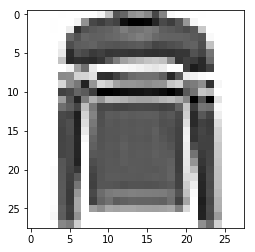

In [5]:
#Defnining the Optimizer
optimizer = Adam(0.0002, 0.5)


#Load the fasion MINT data
(X_train, Y_train ), (X_test, Y_test) = fashion_mnist.load_data()
print("X train shape: ", X_train.shape, "Y_ train: ", Y_train.shape)

X_train = X_train / 127.5 - 1.
plt.imshow(X_train[5], cmap='Greys')
# Making image bigger
X_train = np.expand_dims(X_train, axis = 3)

In [6]:
#Creating the generator
  
def build_generator():
  #There are two ways to build a NN, Sequential and Functional, we are going to use Sequential model, because is the easiest one
    model = Sequential()

    #We are going to create a NN with 3 layers

    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    
    model.add(Dense(np.prod((28,28,1)), activation='tanh'))
    model.add(Reshape((28,28,1)))

    model.summary()
    
    #Adding noise to the image
    noise = Input(shape = (100,))
    img = model(noise)

    return Model(noise, img)

generator = build_generator()
z = Input(shape=(100,))

img = generator(z)





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 1024)         

In [7]:
#Creating the discrimnator
def build_discriminator():

    model = Sequential()

    model.add(Flatten(input_shape=(28,28,1)))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    img = Input(shape=(28,28,1))
    validity = model(img)

    return Model(img, validity)
  
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer = optimizer, metrics=['accuracy'])
discriminator.trainable = False


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

In [0]:
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer = optimizer)

In [0]:
def sample_images(epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, 100))
        gen_imgs = generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        #fig.savefig("images/%d.png" % epoch)
        plt.show()
        plt.close()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.649137, acc.: 60.50%] [G loss: 0.900932]


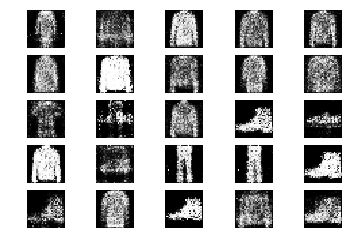

100 [D loss: 0.656362, acc.: 61.00%] [G loss: 0.896760]


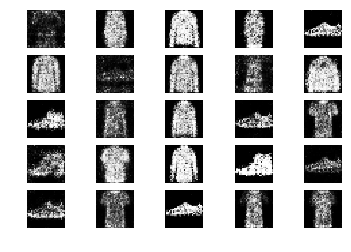

200 [D loss: 0.648121, acc.: 65.00%] [G loss: 0.871758]


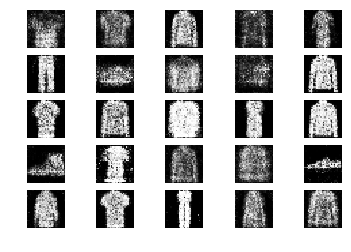

300 [D loss: 0.612827, acc.: 68.50%] [G loss: 0.889132]


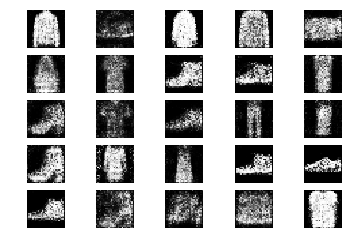

400 [D loss: 0.622777, acc.: 64.00%] [G loss: 0.867319]


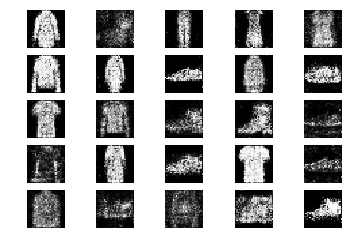

500 [D loss: 0.647704, acc.: 62.50%] [G loss: 0.846962]


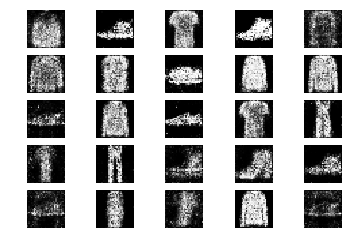

600 [D loss: 0.668759, acc.: 59.50%] [G loss: 0.927104]


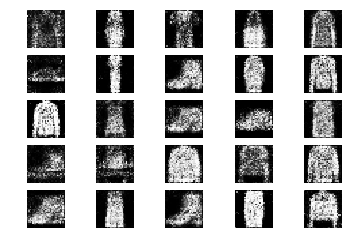

700 [D loss: 0.652544, acc.: 62.00%] [G loss: 0.884570]


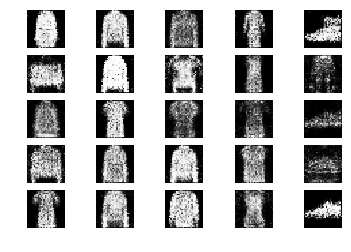

800 [D loss: 0.674298, acc.: 55.50%] [G loss: 0.860266]


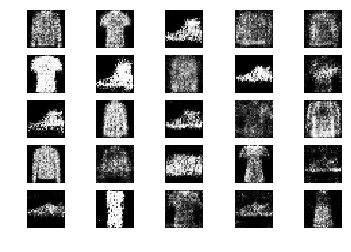

900 [D loss: 0.628857, acc.: 66.00%] [G loss: 0.875038]


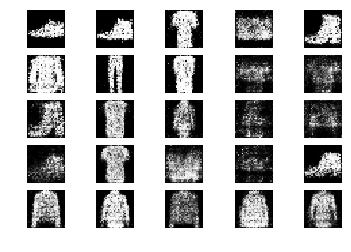

1000 [D loss: 0.646366, acc.: 63.50%] [G loss: 0.890822]


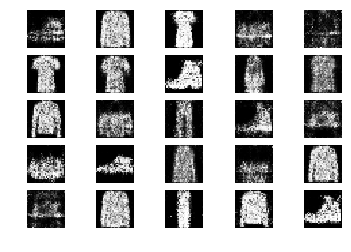

1100 [D loss: 0.627035, acc.: 64.50%] [G loss: 0.879646]


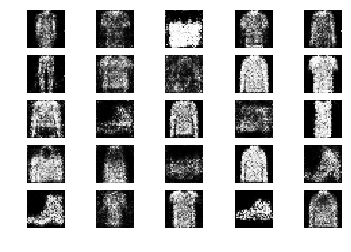

1200 [D loss: 0.646106, acc.: 61.00%] [G loss: 0.903131]


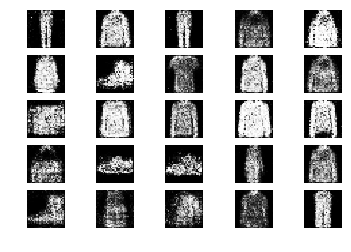

1300 [D loss: 0.657012, acc.: 58.50%] [G loss: 0.909818]


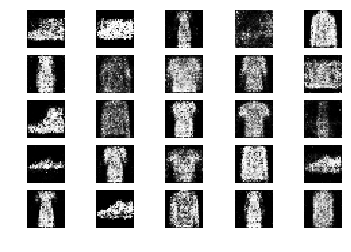

1400 [D loss: 0.668138, acc.: 62.00%] [G loss: 0.890319]


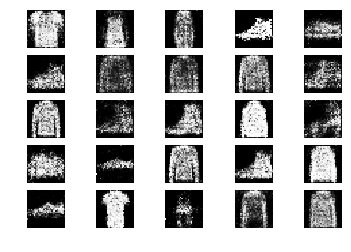

1500 [D loss: 0.665074, acc.: 57.50%] [G loss: 0.845210]


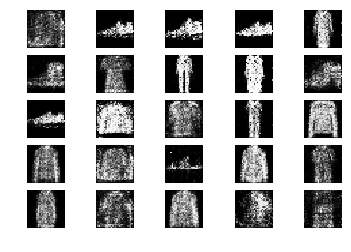

1600 [D loss: 0.673497, acc.: 56.50%] [G loss: 0.855651]


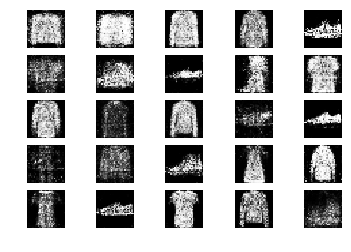

1700 [D loss: 0.619962, acc.: 69.00%] [G loss: 0.862964]


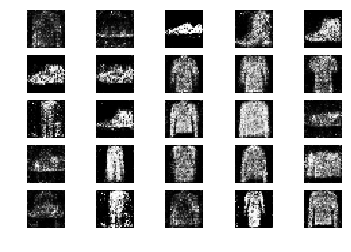

1800 [D loss: 0.651361, acc.: 66.00%] [G loss: 0.874977]


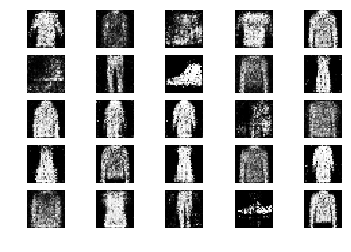

1900 [D loss: 0.639844, acc.: 66.50%] [G loss: 0.876723]


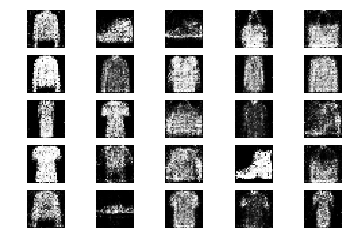

2000 [D loss: 0.665798, acc.: 61.00%] [G loss: 0.877239]


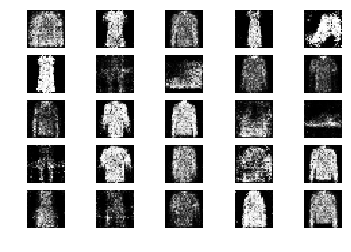

2100 [D loss: 0.641820, acc.: 63.50%] [G loss: 0.891283]


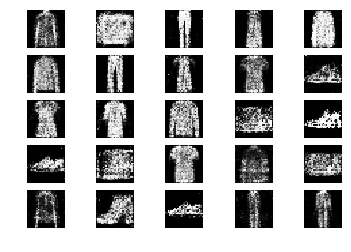

2200 [D loss: 0.689101, acc.: 52.00%] [G loss: 0.889043]


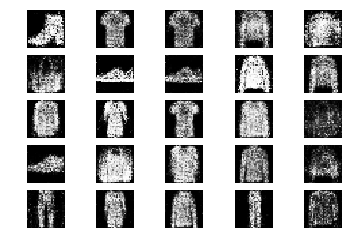

2300 [D loss: 0.654423, acc.: 63.50%] [G loss: 0.813161]


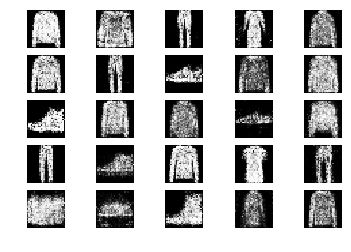

2400 [D loss: 0.673249, acc.: 59.50%] [G loss: 0.862931]


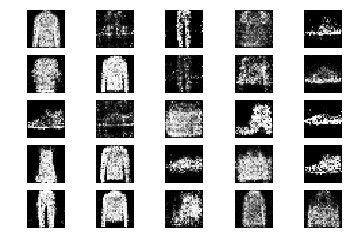

2500 [D loss: 0.667572, acc.: 59.00%] [G loss: 0.873397]


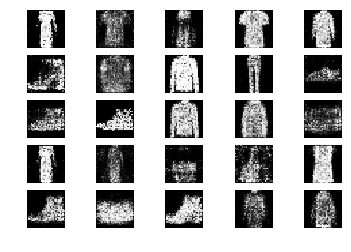

2600 [D loss: 0.684473, acc.: 55.00%] [G loss: 0.888034]


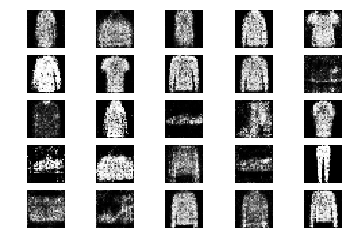

2700 [D loss: 0.650539, acc.: 63.00%] [G loss: 0.853543]


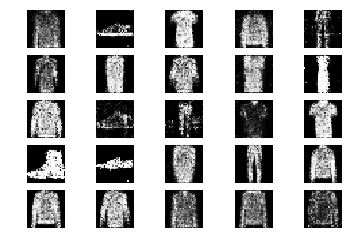

2800 [D loss: 0.650067, acc.: 57.50%] [G loss: 0.889058]


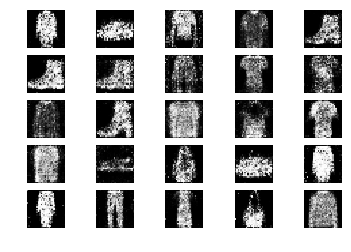

2900 [D loss: 0.666603, acc.: 59.00%] [G loss: 0.893651]


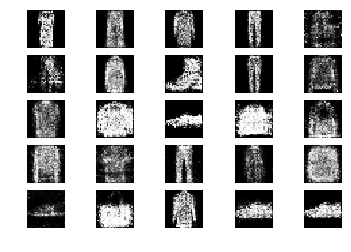

3000 [D loss: 0.650738, acc.: 67.00%] [G loss: 0.900688]


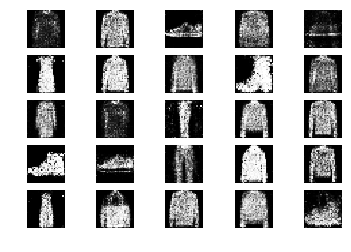

3100 [D loss: 0.666754, acc.: 58.00%] [G loss: 0.853570]


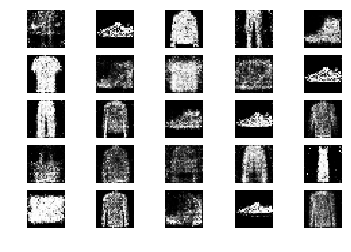

3200 [D loss: 0.672007, acc.: 61.00%] [G loss: 0.869073]


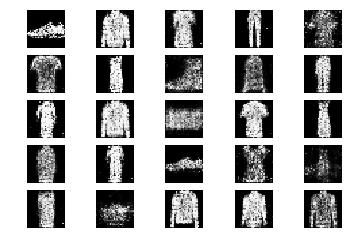

3300 [D loss: 0.677397, acc.: 53.50%] [G loss: 0.848901]


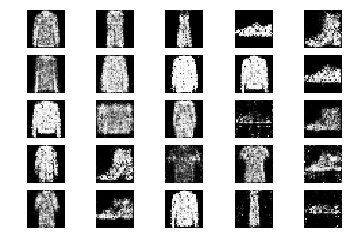

3400 [D loss: 0.679355, acc.: 53.00%] [G loss: 0.885079]


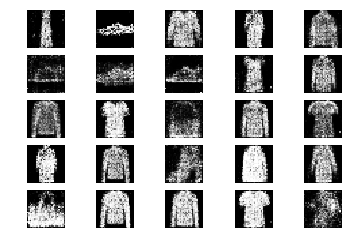

3500 [D loss: 0.667173, acc.: 64.50%] [G loss: 0.877626]


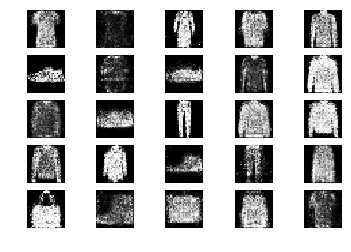

3600 [D loss: 0.667682, acc.: 62.00%] [G loss: 0.874138]


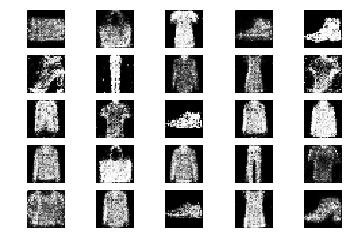

3700 [D loss: 0.679630, acc.: 60.50%] [G loss: 0.829036]


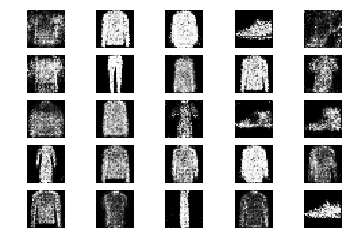

3800 [D loss: 0.687639, acc.: 55.00%] [G loss: 0.840834]


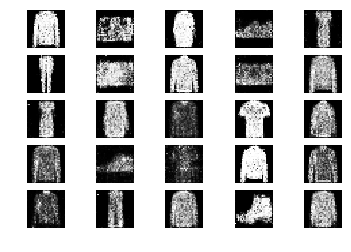

3900 [D loss: 0.658556, acc.: 62.00%] [G loss: 0.884160]


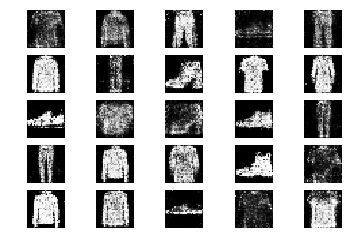

4000 [D loss: 0.669733, acc.: 58.50%] [G loss: 0.880535]


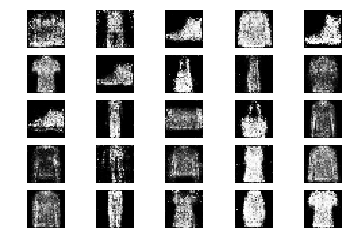

4100 [D loss: 0.669835, acc.: 55.50%] [G loss: 0.868794]


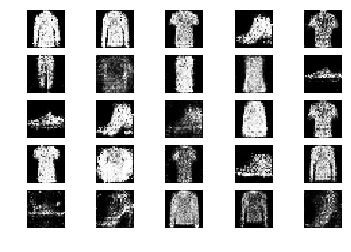

4200 [D loss: 0.663577, acc.: 62.00%] [G loss: 0.844194]


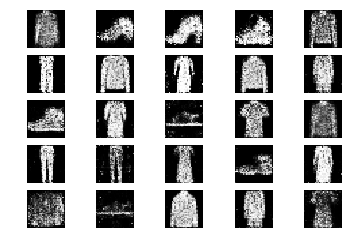

4300 [D loss: 0.666763, acc.: 58.00%] [G loss: 0.820595]


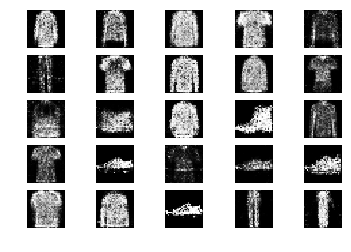

4400 [D loss: 0.666989, acc.: 58.50%] [G loss: 0.829139]


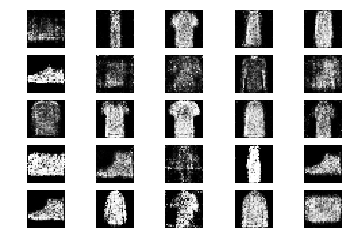

4500 [D loss: 0.666985, acc.: 59.00%] [G loss: 0.849337]


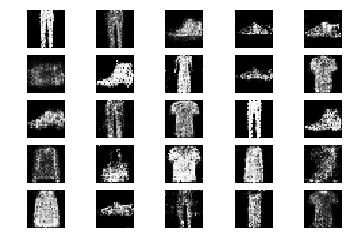

4600 [D loss: 0.656721, acc.: 65.00%] [G loss: 0.861578]


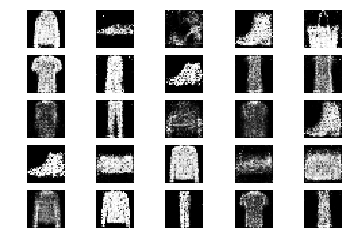

4700 [D loss: 0.650864, acc.: 60.50%] [G loss: 0.898121]


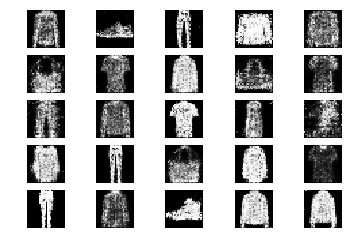

4800 [D loss: 0.679401, acc.: 56.00%] [G loss: 0.838588]


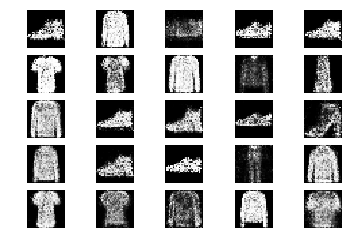

4900 [D loss: 0.664583, acc.: 58.50%] [G loss: 0.864549]


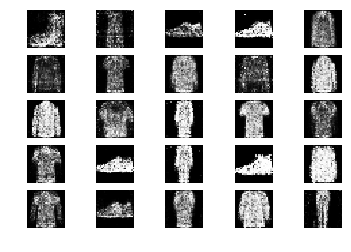

In [43]:

epochs = 5000
batch_size = 100

# Generate a matriz with zeros and ones
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):

      idx = np.random.randint(0, X_train.shape[0], batch_size)
      imgs = X_train[idx]

      noise = np.random.normal(0, 1, (batch_size, 100))

      gen_imgs = generator.predict(noise)

      d_loss_real = discriminator.train_on_batch(imgs, valid)
      d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
      d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)


      noise = np.random.normal(0, 1, (batch_size, 100))

      g_loss = combined.train_on_batch(noise, valid)
      

      if epoch % 100 == 0:
        print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
        sample_images(epoch)
      

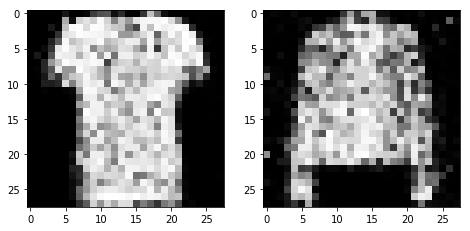

In [51]:
r, c = 5,5 

noise = np.random.normal(0, 1, (r*c, 100))

gen_imgs = generator.predict(noise)

plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(gen_imgs[14, : , : , 0], cmap='gray')
plt.subplot(132)
plt.imshow(gen_imgs[19, : , : , 0], cmap='gray')



